In [40]:
# Basics Imports 

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

import keras as K
print("Versão do Keras:", K.__version__)

# Imports Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


Versão do TensorFlow: 2.0.0
Versão do Keras: 2.3.1


In [54]:
plt.close('all')

DATA_PATH = '/home/rafael/Downloads/chest-xray-pneumonia/xray/train/'
pulmao_NORMAL = '/home/rafael/Downloads/chest-xray-pneumonia/xray/train/NORMAL/'
pulmao_PNEUMONIA ='/home/rafael/Downloads/chest-xray-pneumonia/xray/train/PNEUMONIA/'
pulmao_test_NORMAL = '/home/rafael/Downloads/chest-xray-pneumonia/xray/test/NORMAL/'
pulmao_test_PNEUMONIA ='/home/rafael/Downloads/chest-xray-pneumonia/xray/test/PNEUMONIA/'

In [57]:
# select sample to train and test
im_pulmao_NORMAL = os.listdir('/home/rafael/Downloads/chest-xray-pneumonia/xray/train/NORMAL/')
im_pulmao_PNEUMONIA = os.listdir('/home/rafael/Downloads/chest-xray-pneumonia/xray/train/PNEUMONIA/')
im_pulmao_test_NORMAL = os.listdir('/home/rafael/Downloads/chest-xray-pneumonia/xray/test/NORMAL/')
im_pulmao_test_PNEUMONIA = os.listdir('/home/rafael/Downloads/chest-xray-pneumonia/xray/test/PNEUMONIA/')

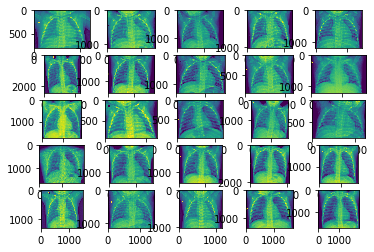

In [43]:
#  plot some examples
# box size for cropping

fig, ax = plt.subplots(5,5)

for axes in ax.reshape(-1):    
    im_ind = np.random.choice(im_pulmao_NORMAL)
    #print(im_ind)
    im = mpimg.imread(pulmao_NORMAL+im_ind)
    
    
    axes.imshow(im)


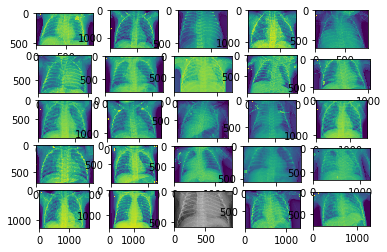

In [44]:
fig, ax = plt.subplots(5,5)

for axes in ax.reshape(-1):   
    im_ind = np.random.choice(im_pulmao_PNEUMONIA)
    im = mpimg.imread(pulmao_PNEUMONIA+im_ind)
    
    axes.imshow(im) 

In [45]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
# Pré-processamento das imagens de treino e validação
dataset_treino = '/home/rafael/Downloads/chest-xray-pneumonia/xray/train/'
dataset_validation = '/home/rafael/Downloads/chest-xray-pneumonia/xray/val/'
dataset_test = '/home/rafael/Downloads/chest-xray-pneumonia/xray/test/'

training_set = train_datagen.flow_from_directory(dataset_treino,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(dataset_validation,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')
test_set = test_datagen.flow_from_directory(dataset_test,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
historico = classifier.fit_generator(training_set,epochs = 100,validation_data = validation_set)

Epoch 1/100
 95/163 [================>.............] - ETA: 40s - loss: 0.2229 - accuracy: 0.9115

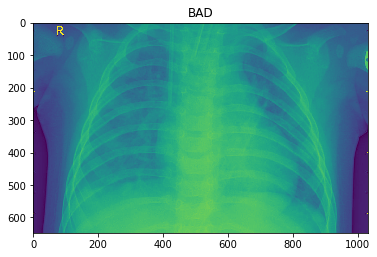

In [60]:
n = 0
test = pulmao_test_NORMAL+im_pulmao_test_NORMAL[n]
test2 = pulmao_test_PNEUMONIA+im_pulmao_test_PNEUMONIA[n]

test_image = image.load_img(test, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
    
if result[0][0] == 1:
    prediction = 'BAD'
else:
    prediction = 'NORMAL'    
    
im = mpimg.imread(test2)
plt.title(prediction)
plt.imshow(im)

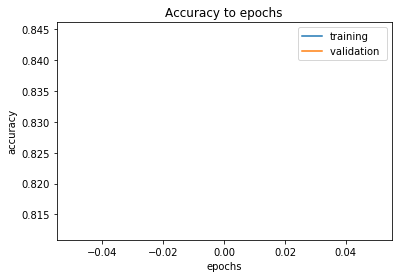

In [61]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Accuracy to epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation '])

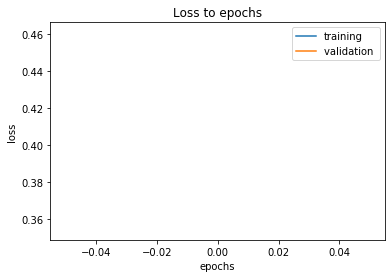

In [62]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss to epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training', 'validation '])

In [63]:
loss_tes, acc_teste = classifier.evaluate(test_set)
print('Perda do teste: ', loss_tes)
print('Acurácia do teste: ', acc_teste)

20/20 [==============================] - 11s 530ms/step
Perda do teste:  0.22246307134628296
Acurácia do teste:  0.8493589758872986
